In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as matplot
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import validation_curve

In [2]:
df = pd.read_csv('class C.csv')


In [3]:
df.head()


,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.67,0,0.70,3,149,3,0,0,support,low
1,0.67,0,0.70,3,149,3,0,0,support,low
2,0.71,0,0.50,4,253,3,0,0,RandD,medium
3,0.68,0,0.54,4,153,3,0,0,product_mng,medium
4,0.71,0,0.63,3,249,3,0,0,IT,low


In [4]:
#check for any missing values 
df.isnull().any()


satisfaction_level       False
left                     False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [5]:
#Rename Columns for better readability 
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'Churn'
                        })

In [6]:
df = df.rename(columns={'time_spend_company': 'yearsAtCompany',
                       'Work_accident': 'workAccident'})

In [7]:
df.head()


,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,0.67,0,0.70,3,149,3,0,0,support,low
1,0.67,0,0.70,3,149,3,0,0,support,low
2,0.71,0,0.50,4,253,3,0,0,RandD,medium
3,0.68,0,0.54,4,153,3,0,0,product_mng,medium
4,0.71,0,0.63,3,249,3,0,0,IT,low


In [8]:
df.dtypes


satisfaction           float64
Churn                    int64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department              object
salary                  object
dtype: object

In [9]:
#How many employees in the dataset ? 
df.shape

(7499, 10)

In [10]:
#rate of Churn of the company 
Churn_rate = df.Churn.value_counts()/df.shape[0]
Churn_rate


0    0.869583
1    0.130417
Name: Churn, dtype: float64

In [11]:

#Describe the Statistical overview of the employees 
df.describe()

,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,0.812311,0.130417,0.763606,3.909321,205.290172,3.547940,0.159088,0.042539
std,0.114183,0.336785,0.160277,0.919857,44.654240,1.621307,0.365782,0.201829
min,0.110000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.740000,0.000000,0.630000,3.000000,167.000000,2.000000,0.000000,0.000000
50%,0.820000,0.000000,0.780000,4.000000,210.000000,3.000000,0.000000,0.000000
75%,0.900000,0.000000,0.900000,5.000000,244.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [12]:
#Display the mean summary of Employees (Churn vs Non-Churn)
Churn_Summary = df.groupby('Churn')
Churn_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
Churn,,,,,,,
0,0.813147,0.742497,3.818893,199.996626,3.325717,0.175280,0.046005
1,0.806738,0.904356,4.512270,240.585890,5.029652,0.051125,0.019427


In [13]:

#Create a Correlation matrix. To explain what features correlate the most with Churn, what other correlations can be found 
corr = df.corr()
corr

,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
satisfaction,1.000000,-0.018902,-0.094817,-0.051666,0.065182,-0.089949,-0.004780,-0.288534
Churn,-0.018902,1.000000,0.340109,0.253864,0.306126,0.353948,-0.114313,-0.044349
evaluation,-0.094817,0.340109,1.000000,0.097872,0.148565,0.103132,-0.063405,-0.075738
projectCount,-0.051666,0.253864,0.097872,1.000000,0.103740,0.119528,-0.036396,-0.035972
averageMonthlyHours,0.065182,0.306126,0.148565,0.103740,1.000000,0.095344,-0.015842,-0.025683
yearsAtCompany,-0.089949,0.353948,0.103132,0.119528,0.095344,1.000000,-0.003529,0.080376
workAccident,-0.004780,-0.114313,-0.063405,-0.036396,-0.015842,-0.003529,1.000000,0.045617
promotion,-0.288534,-0.044349,-0.075738,-0.035972,-0.025683,0.080376,0.045617,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

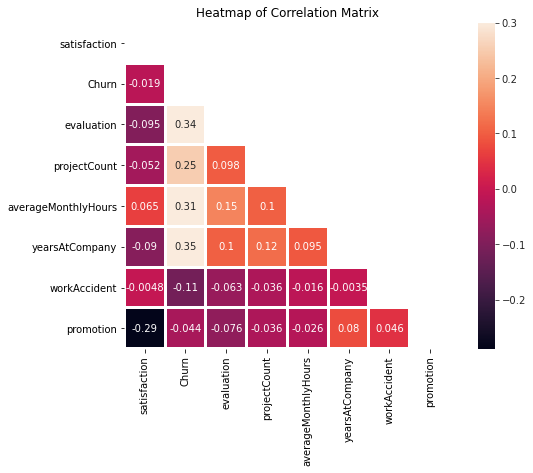

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
corr = (corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, linewidths=2.0, ax=ax, mask=mask, vmax=.3, square=True, annot=True)
plt.title('Heatmap of Correlation Matrix')


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

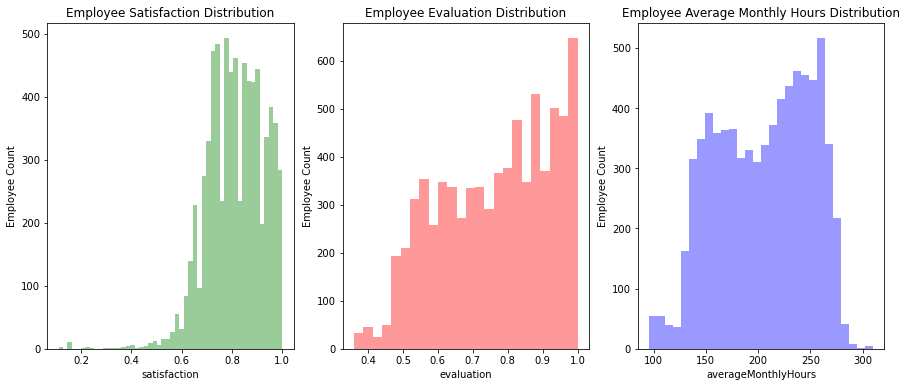

In [15]:
#setup the matplotlib
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

#Graph Employee Satisfaction 
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

#Graph Employee Evaluation 
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

#Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

In [16]:

cat_var = ['Department','salary','Churn','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()


,Churn,promotion,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.67,0.70,3,149,3,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0.67,0.70,3,149,3,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0.71,0.50,4,253,3,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0.68,0.54,4,153,3,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0.71,0.63,3,249,3,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [19]:

from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, X_train, y_train, cv=9, scoring='f1')

rf_result
print(rf_result.mean())

0.9707410935262476


In [20]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(X_train, y_train)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1304
           1       0.98      0.95      0.97       196

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



In [21]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,yearsAtCompany,0.426002
1,evaluation,0.173127
2,averageMonthlyHours,0.163884
3,satisfaction,0.094180
4,projectCount,0.083136
5,salary_low,0.011662
6,workAccident,0.008296
7,promotion,0.006030
8,salary_medium,0.005437
9,Department_technical,0.005198


<AxesSubplot:xlabel='importance', ylabel='index'>

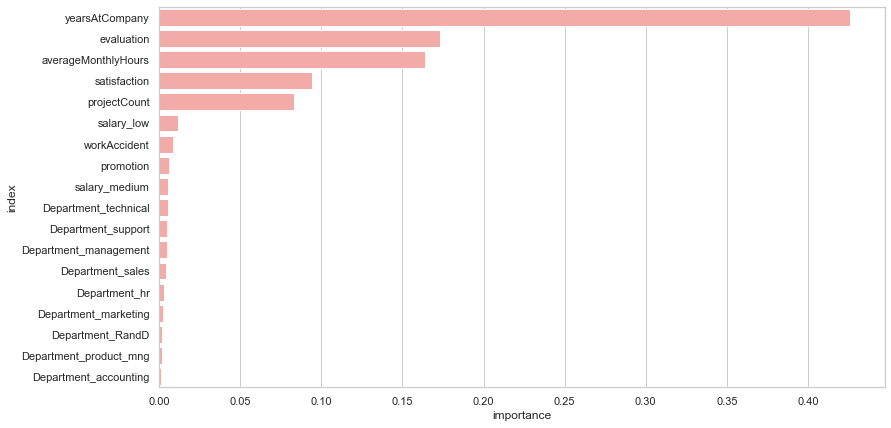

In [22]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="r")

In [23]:
param_range = np.arange(1, 200, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                  X, y, param_name="n_estimators", param_range=param_range,
                                  cv=10, scoring="accuracy", n_jobs=-1)

In [24]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

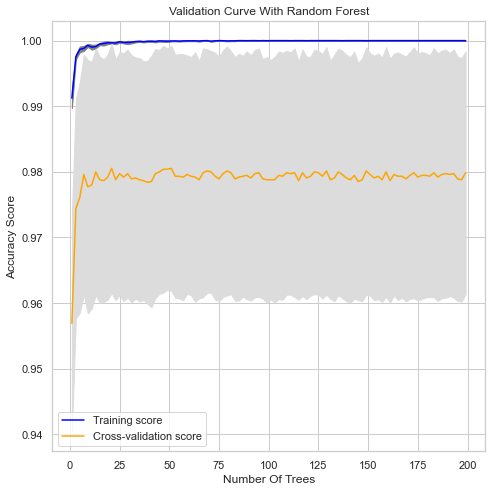

In [26]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="orange")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()